In [1]:
# Make sure we've got the latest version of fastai and ipywidgets:
!pip install -Uqq fastai
!pip install -Uqq ipywidgets

In [25]:
# Import modules
from ipywidgets import FileUpload, Label
from fastai.vision.all import *
from PIL import Image, ImageDraw
import math

In [26]:
# Define function for model namespace
def is_cat(x): return x[0].isupper() 

Create a grid of images with the prediction written as text on each image

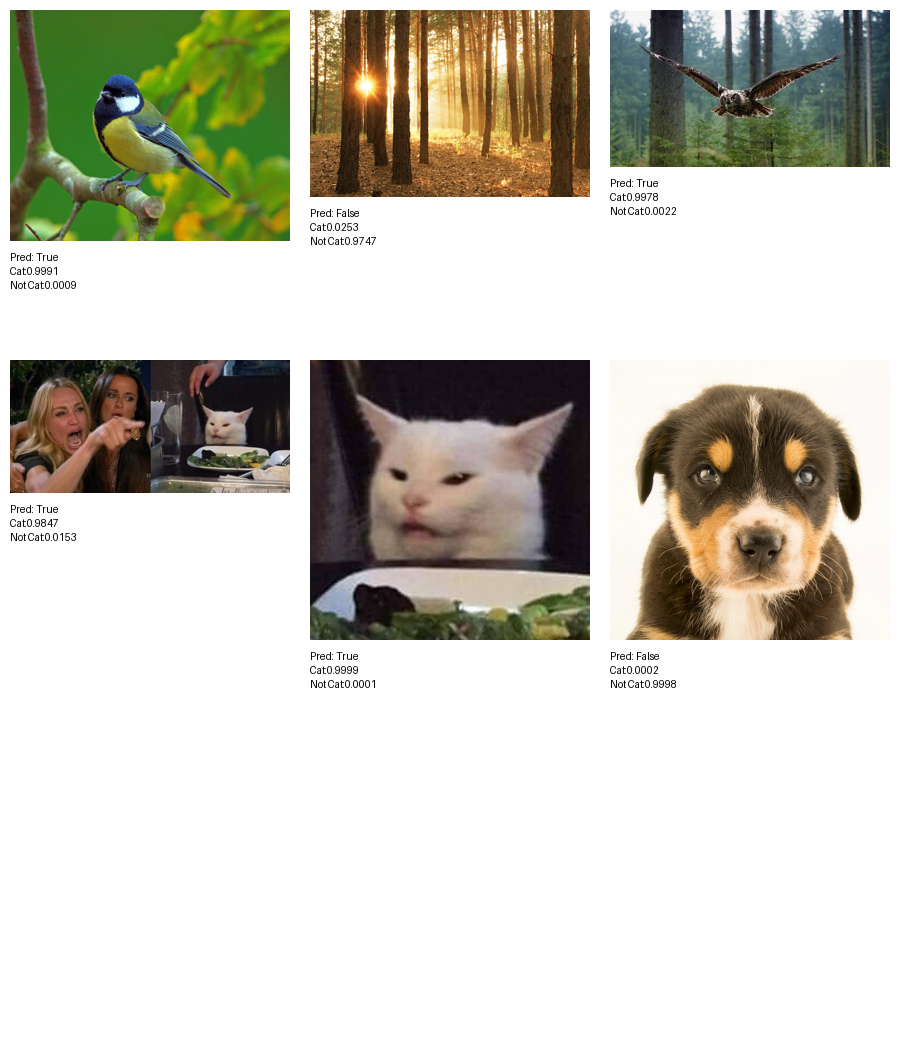

In [28]:
img_base_path = Path(r"C:\Users\user\Documents\Code\fastai-Practical-Deep-Learning-for-Coders\Part1\Lesson1")
image_files = list(img_base_path.glob('*.jpg')) + list(img_base_path.glob('*.jpeg')) + list(img_base_path.glob('*.png'))
all_pil_images = [PILImage.create(image_file) for image_file in image_files]

loaded_learner = load_learner('model.pkl')

# Calculate grid dimensions
n_images = len(all_pil_images)
grid_size = math.ceil(math.sqrt(n_images))
cell_width = 300
cell_height = 350  # Extra space for text

# Create blank canvas
grid_width = grid_size * cell_width
grid_height = grid_size * cell_height
grid_image = Image.new('RGB', (grid_width, grid_height), 'white')

for idx, img in enumerate(all_pil_images):
    # Get predictions
    pred, pred_idx, probs = loaded_learner.predict(img)
    pred_text = f"Pred: {pred}\nCat:{probs[1]:.4f}\nNot Cat:{probs[0]:.4f}"
    
    # Resize image to fit celldi
    img.thumbnail((cell_width-20, cell_height-50))
    
    # Calculate position
    row = idx // grid_size
    col = idx % grid_size
    x = col * cell_width + (cell_width - img.width) // 2
    y = row * cell_height + 10
    
    # Paste image
    grid_image.paste(img, (x, y))
    
    # Add text
    draw = ImageDraw.Draw(grid_image)
    text_y = y + img.height + 10
    draw.text((x, text_y), pred_text, fill='black')

display(grid_image)